In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
%cd /gdrive/MyDrive/ColabNotebooks/AN2DL/Homework1/
%pwd
%ls

/gdrive/MyDrive/ColabNotebooks/AN2DL/Homework1
Classic_CNN/  training_data_final/            XceptionAndRefining.ipynb
First.ipynb   training_dataset_homework1.zip


In [ ]:
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from keras.applications.xception import preprocess_input

tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)

2.9.2


In [ ]:
# Random seed for reproducibility
seed = 42

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

In [ ]:
import warnings
import logging

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)
tf.get_logger().setLevel('INFO')
tf.autograph.set_verbosity(0)

tf.get_logger().setLevel(logging.ERROR)
tf.get_logger().setLevel('ERROR')
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [ ]:


img_height=96
img_width=96
batch_size=8
data_dir='training_data_final'

train_ds = tfk.utils.image_dataset_from_directory(
    directory=data_dir,
    validation_split=0.2,
    subset="training",
    seed=seed,
    color_mode="rgb",
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tfk.utils.image_dataset_from_directory(
    directory=data_dir,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    color_mode="rgb",
    image_size=(img_height, img_width),
    batch_size=batch_size)

class_names = train_ds.class_names

Found 3542 files belonging to 8 classes.
Using 2834 files for training.
Found 3542 files belonging to 8 classes.
Using 708 files for validation.


In [ ]:
# Labels of the dataset for classification
labels = {0:"Species1",              # 0
          1:"Species2",              # 1
          2:"Species3",              # 2
          3:"Species4",              # 3
          4:"Species5",              # 4
          5:"Species6",              # 5
          6:"Species7",              # 6
          7:"Species8"}              # 7

In [ ]:
from keras.regularizers import l2

def build_model(input_shape):

    # Layer Input -------------------------------------------------------
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    # Layer 1 -----------------------------------------------------------
    conv1 = tfkl.Conv2D(
        filters=25,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        kernel_initializer = tfk.initializers.GlorotUniform(seed),
        kernel_regularizer = l2(0.01)
    )(input_layer)
    
    conv1 = tfkl.BatchNormalization()(conv1)
    
    leaky_relu_layer1 = tfkl.LeakyReLU()(conv1)
    
    pool1 = tfkl.MaxPooling2D(
        pool_size = (2, 2)
    )(leaky_relu_layer1)

    # Layer 2 -----------------------------------------------------------
    conv2 = tfkl.Conv2D(
        filters=50,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        kernel_initializer = tfk.initializers.GlorotUniform(seed),
        kernel_regularizer = l2(0.01)
    )(pool1)
    
    conv2 = tfkl.BatchNormalization()(conv2)
    
    leaky_relu_layer2 = tfkl.LeakyReLU()(conv2)
    
    pool2 = tfkl.MaxPooling2D(
        pool_size = (2, 2)
    )(leaky_relu_layer2)

    # Layer 3 -----------------------------------------------------------
    conv3 = tfkl.Conv2D(
        filters=100,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        kernel_initializer = tfk.initializers.GlorotUniform(seed),
        kernel_regularizer = l2(0.01)
    )(pool2)
    
    conv3 = tfkl.BatchNormalization()(conv3)
    
    leaky_relu_layer3 = tfkl.LeakyReLU()(conv3)
    
    pool3 = tfkl.MaxPooling2D(
        pool_size = (2, 2)
    )(leaky_relu_layer3)

    

    # Layer 4 -----------------------------------------------------------
    conv4 = tfkl.Conv2D(
        filters=200,
        kernel_size=(5, 5),
        strides = (1, 1),
        padding = 'same',
        kernel_initializer = tfk.initializers.GlorotUniform(seed),
        kernel_regularizer = l2(0.01)
    )(pool3)
    
    conv4 = tfkl.BatchNormalization()(conv4)
    
    leaky_relu_layer4 = tfkl.LeakyReLU()(conv4)
    
    pool4 = tfkl.MaxPooling2D(
        pool_size = (2, 2)
    )(leaky_relu_layer4)

    

    # Layer 5 -----------------------------------------------------------
    conv5 = tfkl.Conv2D(
        filters=300,
        kernel_size=(5, 5),
        strides = (1, 1),
        padding = 'same',
        kernel_initializer = tfk.initializers.GlorotUniform(seed),
        kernel_regularizer = l2(0.01)
    )(pool4)
    
    conv5 = tfkl.BatchNormalization()(conv5)
    
    leaky_relu_layer5 = tfkl.LeakyReLU()(conv5)
    
    pool5 = tfkl.MaxPooling2D(
        pool_size = (2, 2)
    )(leaky_relu_layer5)

    

    # Layer 6 -----------------------------------------------------------
    conv6 = tfkl.Conv2D(
        filters=400,
        kernel_size=(5, 5),
        strides = (1, 1),
        padding = 'same',
        kernel_initializer = tfk.initializers.GlorotUniform(seed),
        kernel_regularizer = l2(0.01)
    )(pool5)
    
    conv6 = tfkl.BatchNormalization()(conv6)
    
    leaky_relu_layer6 = tfkl.LeakyReLU()(conv6)
    
    pool6 = tfkl.MaxPooling2D(
        pool_size = (2, 2)
    )(leaky_relu_layer6)

    

    # Layer 7 -----------------------------------------------------------
    conv7 = tfkl.Conv2D(
        filters=500,
        kernel_size=(5, 5),
        strides = (1, 1),
        padding = 'same',
        kernel_initializer = tfk.initializers.GlorotUniform(seed),
        kernel_regularizer = l2(0.01)
    )(pool6)
    
    conv7 = tfkl.BatchNormalization()(conv7)
    
    leaky_relu_layer7 = tfkl.LeakyReLU()(conv7)

    # Global Average Pooling -----------------------------------------------------------
    glob_pooling = tfkl.GlobalAveragePooling2D(name='GlobalPooling')(leaky_relu_layer7)

    # Dense Layer -----------------------------------------------------------
    classifier_layer1 = tfkl.Dense(units=512, name='Classifier1', kernel_initializer=tfk.initializers.GlorotUniform(seed), kernel_regularizer = l2(0.01))(glob_pooling)
    
    classifier_layer1 = tfkl.BatchNormalization()(classifier_layer1)
    
    leaky_relu_layer = tfkl.LeakyReLU()(classifier_layer1)
    
    leaky_relu_layer = tfkl.Dropout(0.3, seed=seed)(leaky_relu_layer)

    # Output Layer -----------------------------------------------------------
    output_layer = tfkl.Dense(units=8, activation='softmax', kernel_initializer=tfk.initializers.GlorotUniform(seed), name='Output')(leaky_relu_layer)

    
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    model.compile(
        loss=tfk.losses.CategoricalCrossentropy(),
        optimizer=tfk.optimizers.Adam(),
        metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
    )

    return model

In [ ]:
# Build the model and print the shape
input_shape=(96, 96, 3)
model = build_model(input_shape)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 96, 96, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 96, 96, 25)        700       
                                                                 
 batch_normalization (BatchN  (None, 96, 96, 25)       100       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 96, 96, 25)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 25)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 50)        11300 

In [ ]:
# Learning Rate Scheduler
def scheduler(epoch, lr):
   if epoch < 10:
     return lr
   else:
     return lr * tf.math.exp(-0.1)

In [ ]:
# Utility function to create folders and callbacks for training
import datetime

def create_folders_and_callbacks(model_name) :
    exps_dir = os.path.join('data_augmentation_experiments')
    if not os.path.exists(exps_dir):
        os.makedirs(exps_dir)

    now = datetime.datetime.now().strftime('%b%d_%H-%M-%S')
    
    exp_dir = os.path.join(exps_dir, model_name + '_' + str(now))
    if not os.path.exists(exp_dir):
        os.makedirs(exp_dir)
      
    callbacks = []

    # Model checkpoint ---------------------------------------------------
    ckpt_dir = os.path.join(exp_dir, 'ckpts')
    if not os.path.exists(ckpt_dir):
        os.makedirs(ckpt_dir)

    ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(ckpt_dir, 'cp'), # filepath is where I want to save the model
                                                     save_weights_only=False, # save only the weights ora all the model
                                                     save_best_only=True) # if True saves only the results of the best epoch
                                                                              
    callbacks.append(ckpt_callback)

    # Visualize Learning on Tensorboard ----------------------------------
    tb_dir = os.path.join(exp_dir, 'tb_logs') # logs where we save the events, where the tensorboard will read the logs
    if not os.path.exists(tb_dir):
        os.makedirs(tb_dir)
      
    tb_callback = tf.keras.callbacks.TensorBoard(log_dir=tb_dir,
                                              profile_batch=0,
                                              histogram_freq=1)
    callbacks.append(tb_callback)
    
    # Learning Rate Scheduler --------------------------------------------
    LRS_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
    callbacks.append(LRS_callback)
    
    return callbacks

In [ ]:
callbacks = create_folders_and_callbacks(model_name='Classic_CNN')

history = model.fit(
    x = train_gen,
    batch_size=batch_size,
    epochs = 50,
    validation_data = validation_gen,
    callbacks = callbacks,
).history

Epoch 1/50
355/355 [==============================] - ETA: 0s - loss: 8.7390 - accuracy: 0.3325 - precision: 0.3904 - recall: 0.1664

355/355 [==============================] - 432s 1s/step - loss: 8.7390 - accuracy: 0.3325 - precision: 0.3904 - recall: 0.1664 - val_loss: 5.4363 - val_accuracy: 0.1516 - val_precision: 0.1611 - val_recall: 0.1516 - lr: 0.0010
Epoch 2/50
355/355 [==============================] - ETA: 0s - loss: 2.9027 - accuracy: 0.3293 - precision: 0.4116 - recall: 0.1379

355/355 [==============================] - 289s 811ms/step - loss: 2.9027 - accuracy: 0.3293 - precision: 0.4116 - recall: 0.1379 - val_loss: 2.2527 - val_accuracy: 0.3569 - val_precision: 0.6700 - val_recall: 0.0949 - lr: 0.0010
Epoch 3/50
355/355 [==============================] - ETA: 0s - loss: 2.2696 - accuracy: 0.3318 - precision: 0.4095 - recall: 0.1213

355/355 [==============================] - 286s 807ms/step - loss: 2.2696 - accuracy: 0.3318 - precision: 0.4095 - recall: 0.1213 - val_loss: 2.2016 - val_accuracy: 0.2861 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 0.0010
Epoch 4/50
355/355 [==============================] - ETA: 0s - loss: 2.1814 - accuracy: 0.3145 - precision: 0.3802 - recall: 0.1058

355/355 [==============================] - 284s 800ms/step - loss: 2.1814 - accuracy: 0.3145 - precision: 0.3802 - recall: 0.1058 - val_loss: 2.1963 - val_accuracy: 0.2890 - val_precision: 0.0385 - val_recall: 0.0014 - lr: 0.0010
Epoch 5/50
355/355 [==============================] - 293s 825ms/step - loss: 2.1139 - accuracy: 0.3378 - precision: 0.4252 - recall: 0.1202 - val_loss: 2.2969 - val_accuracy: 0.2521 - val_precision: 0.2716 - val_recall: 0.0892 - lr: 0.0010
Epoch 6/50
355/355 [==============================] - 297s 838ms/step - loss: 2.1752 - accuracy: 0.3202 - precision: 0.3927 - recall: 0.0949 - val_loss: 2.4227 - val_accuracy: 0.1586 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 0.0010
Epoch 7/50
355/355 [==============================] - 276s 777ms/step - loss: 2.1628 - accuracy: 0.3166 - precision: 0.3758 - recall: 0.0874 - val_loss: 2.4614 - val_accuracy: 0.1841 - val_precision: 0.0889 - val_recall: 0.0057 - lr: 0.0010
Epoch 8/50
355/355 [===================

355/355 [==============================] - 284s 799ms/step - loss: 2.1426 - accuracy: 0.3470 - precision: 0.4338 - recall: 0.1005 - val_loss: 2.0865 - val_accuracy: 0.2960 - val_precision: 0.3766 - val_recall: 0.0822 - lr: 0.0010
Epoch 9/50
355/355 [==============================] - 266s 747ms/step - loss: 2.1151 - accuracy: 0.3135 - precision: 0.4003 - recall: 0.0899 - val_loss: 2.3087 - val_accuracy: 0.2210 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 0.0010
Epoch 10/50
355/355 [==============================] - 270s 762ms/step - loss: 2.1569 - accuracy: 0.3191 - precision: 0.4177 - recall: 0.0797 - val_loss: 2.4620 - val_accuracy: 0.1756 - val_precision: 0.2549 - val_recall: 0.1105 - lr: 0.0010
Epoch 11/50
355/355 [==============================] - 292s 822ms/step - loss: 2.1214 - accuracy: 0.3325 - precision: 0.4514 - recall: 0.0966 - val_loss: 3.0008 - val_accuracy: 0.2238 - val_precision: 0.2579 - val_recall: 0.1841 - lr: 9.0484e-04
Epoch 12/50
355/355 [============

355/355 [==============================] - 290s 818ms/step - loss: 1.9848 - accuracy: 0.2796 - precision: 0.3539 - recall: 0.0384 - val_loss: 2.0538 - val_accuracy: 0.2309 - val_precision: 0.0357 - val_recall: 0.0014 - lr: 7.4082e-04
Epoch 14/50
355/355 [==============================] - 281s 791ms/step - loss: 1.9845 - accuracy: 0.2715 - precision: 0.3785 - recall: 0.0423 - val_loss: 2.0959 - val_accuracy: 0.1785 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 6.7032e-04
Epoch 15/50
355/355 [==============================] - 292s 822ms/step - loss: 2.0002 - accuracy: 0.2606 - precision: 0.3701 - recall: 0.0367 - val_loss: 2.3321 - val_accuracy: 0.1530 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 6.0653e-04
Epoch 16/50
355/355 [==============================] - 291s 819ms/step - loss: 1.9095 - accuracy: 0.2740 - precision: 0.3636 - recall: 0.0324 - val_loss: 2.2984 - val_accuracy: 0.2068 - val_precision: 0.5294 - val_recall: 0.0127 - lr: 5.4881e-04
Epoch 17/50


355/355 [==============================] - 300s 844ms/step - loss: 1.8748 - accuracy: 0.2846 - precision: 0.3915 - recall: 0.0293 - val_loss: 1.9608 - val_accuracy: 0.2649 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 4.9659e-04
Epoch 18/50
355/355 [==============================] - 292s 823ms/step - loss: 1.8577 - accuracy: 0.2874 - precision: 0.3853 - recall: 0.0314 - val_loss: 2.8167 - val_accuracy: 0.2167 - val_precision: 0.2800 - val_recall: 0.1388 - lr: 4.4933e-04
Epoch 19/50
355/355 [==============================] - 284s 801ms/step - loss: 1.8648 - accuracy: 0.2683 - precision: 0.3697 - recall: 0.0215 - val_loss: 2.6141 - val_accuracy: 0.1374 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 4.0657e-04
Epoch 20/50
355/355 [==============================] - ETA: 0s - loss: 1.8481 - accuracy: 0.2796 - precision: 0.4096 - recall: 0.0240

355/355 [==============================] - 301s 849ms/step - loss: 1.8481 - accuracy: 0.2796 - precision: 0.4096 - recall: 0.0240 - val_loss: 1.9584 - val_accuracy: 0.2847 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 3.6788e-04
Epoch 21/50
355/355 [==============================] - ETA: 0s - loss: 1.8169 - accuracy: 0.2831 - precision: 0.4270 - recall: 0.0279

355/355 [==============================] - 290s 816ms/step - loss: 1.8169 - accuracy: 0.2831 - precision: 0.4270 - recall: 0.0279 - val_loss: 1.8857 - val_accuracy: 0.2720 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 3.3287e-04
Epoch 22/50
355/355 [==============================] - 289s 814ms/step - loss: 1.8208 - accuracy: 0.2934 - precision: 0.4615 - recall: 0.0275 - val_loss: 2.1522 - val_accuracy: 0.1912 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 3.0119e-04
Epoch 23/50
355/355 [==============================] - 295s 831ms/step - loss: 1.7731 - accuracy: 0.2997 - precision: 0.4917 - recall: 0.0314 - val_loss: 1.9815 - val_accuracy: 0.2181 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 2.7253e-04
Epoch 24/50
355/355 [==============================] - 293s 826ms/step - loss: 1.7562 - accuracy: 0.2948 - precision: 0.4402 - recall: 0.0286 - val_loss: 2.0629 - val_accuracy: 0.2266 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 2.4660e

355/355 [==============================] - 307s 866ms/step - loss: 1.7764 - accuracy: 0.2920 - precision: 0.4630 - recall: 0.0264 - val_loss: 1.8146 - val_accuracy: 0.2776 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 1.6530e-04
Epoch 29/50
355/355 [==============================] - ETA: 0s - loss: 1.6918 - accuracy: 0.3537 - precision: 0.5335 - recall: 0.0589

355/355 [==============================] - 299s 843ms/step - loss: 1.6918 - accuracy: 0.3537 - precision: 0.5335 - recall: 0.0589 - val_loss: 1.6583 - val_accuracy: 0.3711 - val_precision: 0.5849 - val_recall: 0.1756 - lr: 1.4957e-04
Epoch 30/50
355/355 [==============================] - 274s 770ms/step - loss: 1.6680 - accuracy: 0.4069 - precision: 0.5381 - recall: 0.1245 - val_loss: 1.9958 - val_accuracy: 0.2380 - val_precision: 0.4097 - val_recall: 0.0836 - lr: 1.3534e-04
Epoch 31/50
355/355 [==============================] - 290s 817ms/step - loss: 1.6038 - accuracy: 0.4302 - precision: 0.5523 - recall: 0.1453 - val_loss: 1.7334 - val_accuracy: 0.3456 - val_precision: 0.3783 - val_recall: 0.1431 - lr: 1.2246e-04
Epoch 32/50
355/355 [==============================] - ETA: 0s - loss: 1.5816 - accuracy: 0.4270 - precision: 0.5736 - recall: 0.1622

355/355 [==============================] - 297s 837ms/step - loss: 1.5816 - accuracy: 0.4270 - precision: 0.5736 - recall: 0.1622 - val_loss: 1.6557 - val_accuracy: 0.3612 - val_precision: 0.6543 - val_recall: 0.0751 - lr: 1.1080e-04
Epoch 33/50
220/355 [=================>............] - ETA: 1:41 - loss: 1.5704 - accuracy: 0.4460 - precision: 0.5952 - recall: 0.1847

In [ ]:
# Saving the last epoch of the train
save_dir = os.path.join('Second_CNN')
model.save(save_dir)

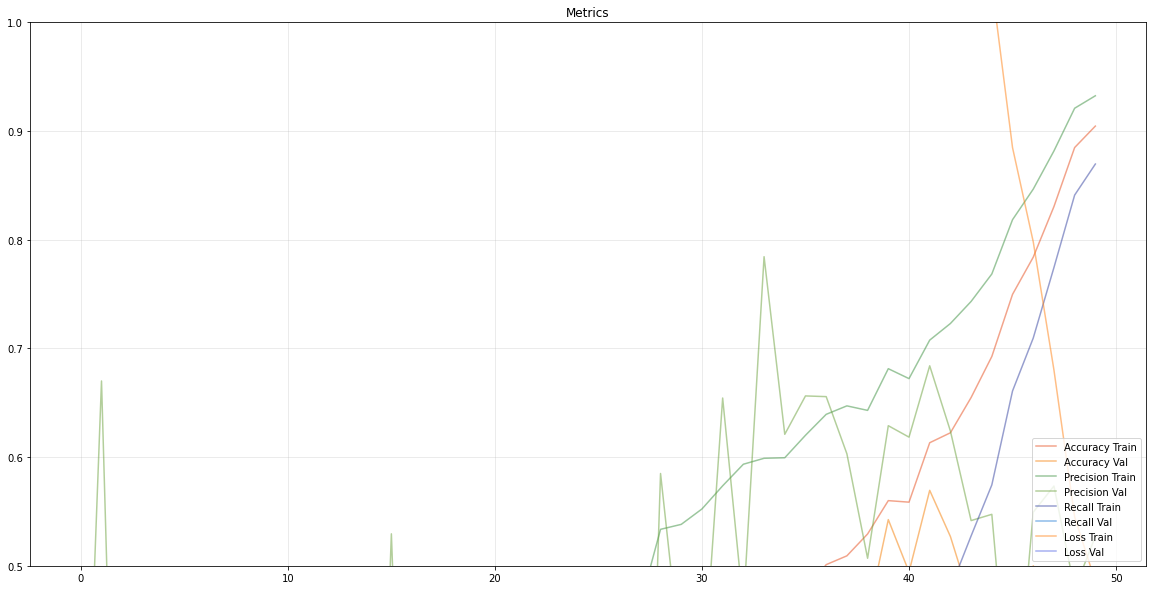

In [ ]:
ALPHA = 0.5

plt.figure(figsize=(20,10))

plt.plot(history['accuracy'], label='Accuracy Train', alpha=ALPHA, color='#E64A19')
plt.plot(history['val_accuracy'], label='Accuracy Val', alpha=ALPHA, color='#F57C00')

plt.plot(history['precision'], label='Precision Train', alpha=ALPHA, color='#388E3C')
plt.plot(history['val_precision'], label='Precision Val', alpha=ALPHA, color='#689F38')

plt.plot(history['recall'], label='Recall Train', alpha=ALPHA, color='#303F9F')
plt.plot(history['val_recall'], label='Recall Val', alpha=ALPHA, color='#1976D2')

plt.plot(history['loss'], label='Loss Train', alpha=ALPHA, color='#ff7f0e')
plt.plot(history['val_loss'], label='Loss Val', alpha=ALPHA, color='#4D61E2')

plt.ylim(.5, 1)
plt.title('Metrics')
plt.legend(loc='lower right')
plt.grid(alpha=.3)
plt.show()